In [ ]:
#!pip install umap-learn[plot]
#!pip install ucimlrepo

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Data
from sklearn.datasets import load_digits, load_wine
from ucimlrepo import fetch_ucirepo
# plotly
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# constants
DATA='wine quality' 
WINE_QUALITY_RESPONSE='quality' # 'color' or 'quality' for 'wine quality'
STANDARDIZE=True
K=3 # new data dimension
METHOD='umap' #'lda' #'umap' // 'tsne'

if DATA=='wine quality':
    # URL of the white wine dataset
    URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
    # load the dataset from the URL
    white_df = pd.read_csv(URL, sep=";")
    # fill the 'color' column
    white_df["color"] = 0 # We have to use integer instead of string 
    # keep only the first of duplicate items
    white_df = white_df.drop_duplicates(keep='first')
    # URL of the red wine dataset
    URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
    # load the dataset from the URL
    red_df = pd.read_csv(URL, sep=";")
    # fill the `color` column
    red_df["color"] = 1  # We have to use integer instead of string 
    # keep only the first of duplicate items
    red_df = red_df.drop_duplicates(keep='first')
    # concatenate to obtain full data set
    df = pd.concat([red_df, white_df], ignore_index=True)
    # define X and y (dataframe)
    X = df.drop(columns=['quality', 'color'])
    if WINE_QUALITY_RESPONSE=='quality':
        y=df[WINE_QUALITY_RESPONSE] # pandas.core.series.Series
        labels=['quality_'+str(i) for i in y]
    if WINE_QUALITY_RESPONSE=='color':
        y = pd.get_dummies(df[WINE_QUALITY_RESPONSE])['red'].replace({True: 1, False: 0}) # pandas.core.series.Series
        labels=['color_'+str(i) for i in y]

# standardize data
if STANDARDIZE:
    stdsc = StandardScaler().set_output(transform="pandas")
    X = stdsc.fit_transform(X)

# split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

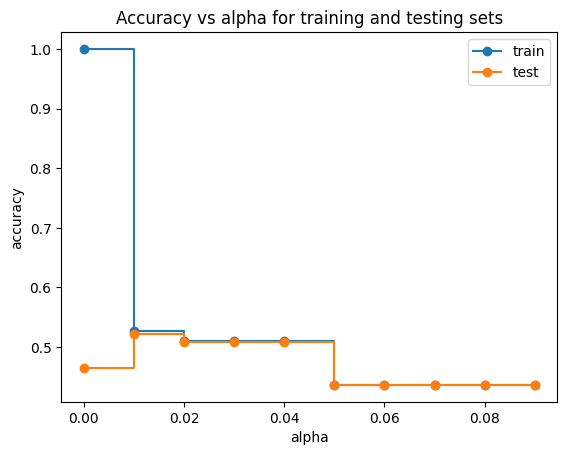

In [2]:
# create a decision tree classifier
#tree = DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier


alphas=[k/100 for k in range(10)]
trees=[]
# fit tree for each alpha
for alpha in alphas:
  # create decision tree with a cost complexity parameter alpha
  tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
  # fit
  tree.fit(X_train, y_train)
  # append tree to trees
  trees.append(tree)

# compute accuracies
train_scores = [clf.score(X_train, y_train) for clf in trees]
test_scores = [clf.score(X_test, y_test) for clf in trees]

# plot accuracy vs alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Plots that shows how the overall accuracy varies with some parameter like max_depth, max_leaf_nodes or another parameter designed to avoid overfitting

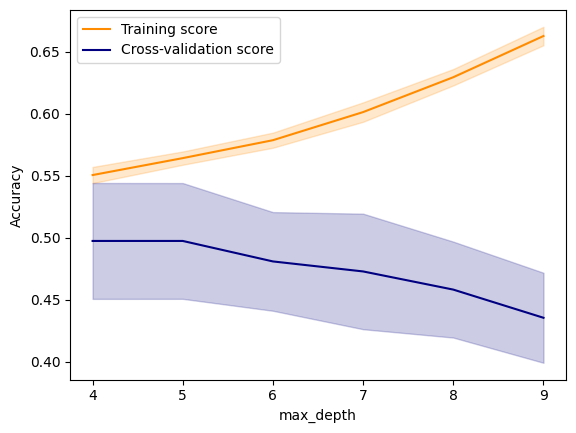

Bias: [0.2526385  0.2526385  0.26954053 0.27799851 0.29367435 0.31884278]
Variance: [0.00218794 0.00218441 0.0015863  0.00217543 0.00150008 0.00132052]


In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

# define the model
model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4)

# define the range of hyperparameters to test
param_range = np.arange(4, 10)

# use validation_curve to compute training and validation scores for different hyperparameters
train_scores, test_scores = validation_curve(
    model, X, y,
    param_name="max_depth", param_range=param_range,
    cv=5,
    scoring="accuracy")

# calculate the mean and standard deviation of the training and validation scores for each hyperparameter
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the validation curves
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")
plt.plot(param_range, test_mean, label="Cross-validation score", color="navy")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

# calculate bias and variance
bias = (1 - test_mean) ** 2
variance = test_std ** 2

print("Bias:", bias)
print("Variance:", variance)

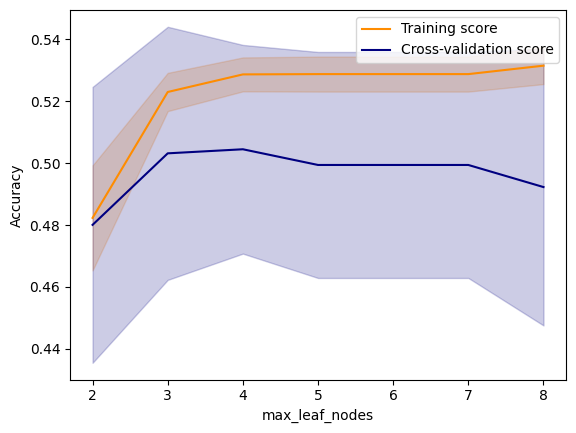

Bias: [0.27032181 0.24681472 0.24550907 0.25056423 0.25056423 0.25056423
 0.25776616]
Variance: [0.00198761 0.00167357 0.00113785 0.00133437 0.00133437 0.00133437
 0.00200103]


In [17]:
# define the range of hyperparameters to test
param_range = np.arange(2, 9)

# use validation_curve to compute training and validation scores for different hyperparameters
train_scores, test_scores = validation_curve(
    model, X, y,
    param_name="max_leaf_nodes", param_range=param_range,
    cv=5,
    scoring="accuracy")

# calculate the mean and standard deviation of the training and validation scores for each hyperparameter
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the validation curves
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")
plt.plot(param_range, test_mean, label="Cross-validation score", color="navy")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.xlabel("max_leaf_nodes")
plt.ylabel("Accuracy")
plt.show()

# calculate bias and variance
bias = (1 - test_mean) ** 2
variance = test_std ** 2

print("Bias:", bias)
print("Variance:", variance)

Create an ensemble of low correlated tree models (bootstrap) and calculate the overall accuracy

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Create a Random Forest classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5704887218045113


Plot the confusion matrix

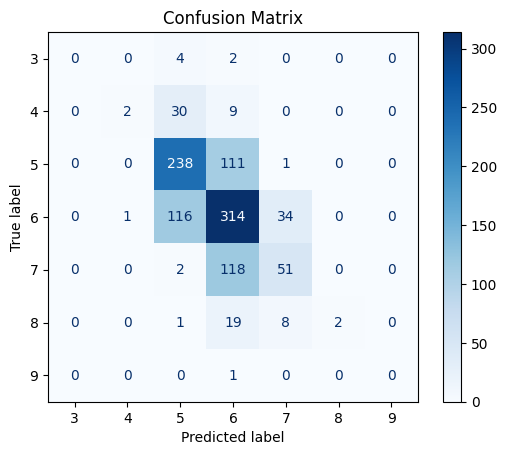

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Try different classifiers to achieve better performance

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Create a Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbm_classifier.fit(X_train, y_train)
y_pred_gbm = gbm_classifier.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Accuracy with Gradient Boosting:", accuracy_gbm)


Accuracy with Gradient Boosting: 0.5460526315789473


In [17]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Create a Support Vector Classifier (SVC)
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy with Support Vector Machines (SVM):", accuracy_svm)


Accuracy with Support Vector Machines (SVM): 0.5366541353383458


In [18]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy with K-Nearest Neighbors (KNN):", accuracy_knn)


Accuracy with K-Nearest Neighbors (KNN): 0.5056390977443609
